La Cantidad todal de Nodos en el sistema es de:  346  Nodos
El espaciado entre nodos por la dirección x es:  1.0 cm
El espaciado entre nodos por la dirección y es:  1.0 cm


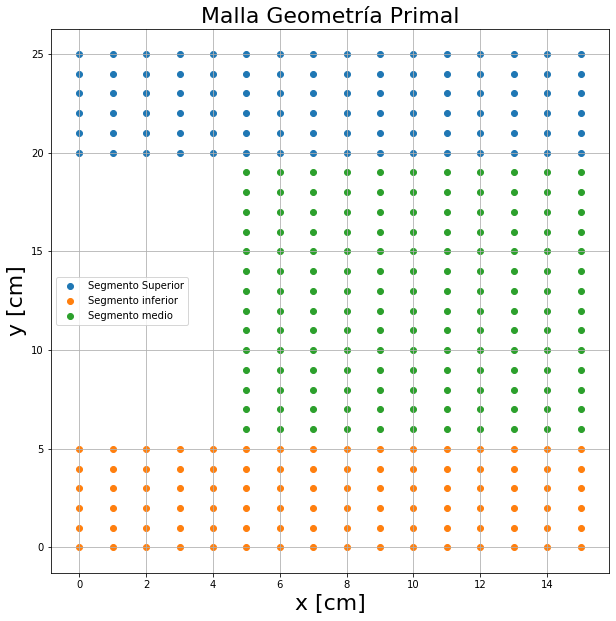

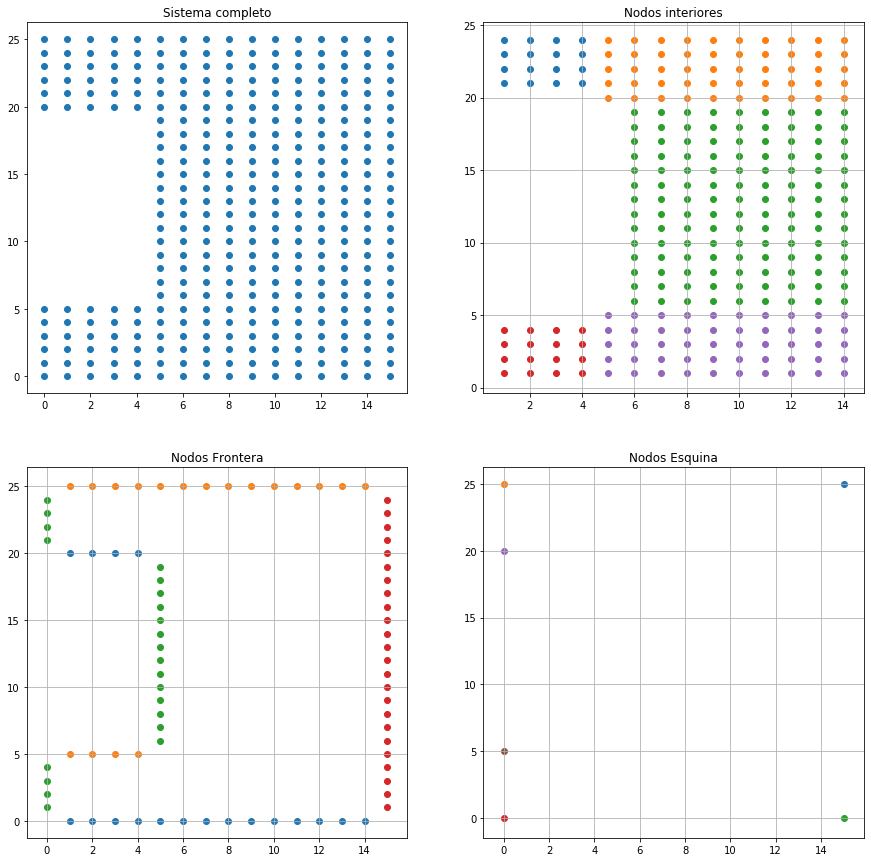

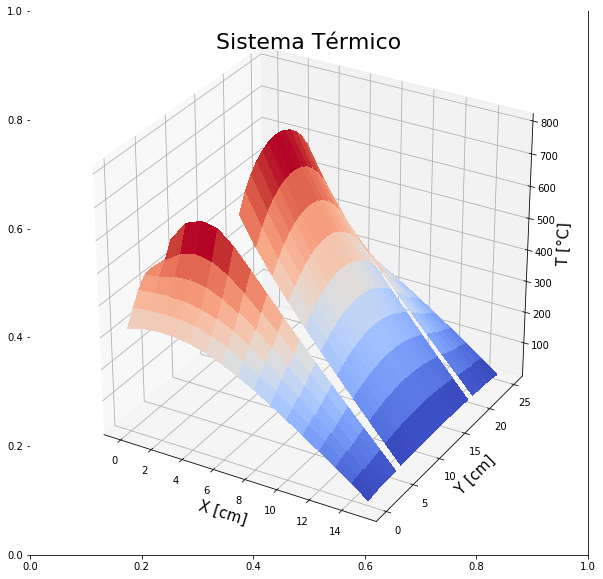

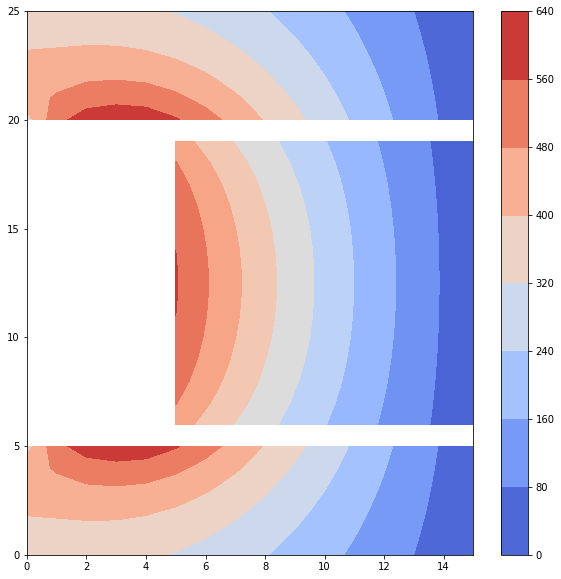

In [30]:
import numpy as np
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import imageio
from mpl_toolkits.mplot3d import Axes3D


################### Parámetros a ingresar #######################

# Nodos:
Nx = 11  # Debe ser un número impar # 11 es el número mágico
Ny = 16  # 16 es el número mágico
# Convecciones:
h1 = 5     #Aire
h2 = 5   #Agua
# Conducción:
k = 50
# Calor de entrada:
q = 5e3/0.02


Temperatura_interior = 700

###################### NO TOCAR #################################

dx = (15-5)/(Nx -1)
dy = (20-5)/(Ny -1)



x1 = np.arange(0,15+dx/2,dx)
y1 = np.linspace(0,5,5/dy +1)



x2 = np.linspace(5,15,Nx)
y2 = np.linspace(5,20,Ny)
y2 = y2[1:Ny-1]


x3 = np.arange(0,15+dx/2,dx)
y3 = np.linspace(20,25,(5/dy) +1)

X1, Y1 = np.meshgrid(x1,y1)
X2, Y2 = np.meshgrid(x2,y2)
X3, Y3 = np.meshgrid(x3,y3)


plt.figure(figsize=(10,10))


plt.scatter(X3,Y3,label = 'Segmento Superior')
plt.scatter(X1,Y1,label = 'Segmento inferior')
plt.scatter(X2,Y2,label = 'Segmento medio')
plt.title('Malla Geometría Primal',fontsize =22 )
plt.xlabel('x [cm]',fontsize =22)
plt.ylabel('y [cm]',fontsize =22)
plt.grid()
plt.legend(loc = 0)





########################## Ubicación e identificación de Nodos ###############################

tamano_total = np.shape(X1)[0]*np.shape(X1)[1] + np.shape(X2)[0]*np.shape(X2)[1] + np.shape(X3)[0]*np.shape(X3)[1]


print('La Cantidad todal de Nodos en el sistema es de: ',tamano_total,' Nodos')
print('El espaciado entre nodos por la dirección x es: ',dx, 'cm')
print('El espaciado entre nodos por la dirección y es: ',dy, 'cm')

XY = np.zeros((tamano_total,2))
cto = 0
for i in range (0,np.shape(X1)[0]):
    for j in range(0,np.shape(X1)[1]):
        XY[cto][0] = X1[i][j]
        XY[cto][1] = Y1[i][j]
        cto = cto +1
for i in range (0,np.shape(X2)[0]):
    for j in range(0,np.shape(X2)[1]):
        XY[cto][0] = X2[i][j]
        XY[cto][1] = Y2[i][j]
        cto = cto + 1
for i in range (0,np.shape(X3)[0]):
    for j in range(0,np.shape(X3)[1]):
        XY[cto][0] = X3[i][j]
        XY[cto][1] = Y3[i][j]
        cto = cto + 1
h2 = 150
q = q*0.02

# Nodos interiores

zona1_e1 = np.where(XY[:,0]>0)
zona1_e11 = np.where(XY[zona1_e1][:,0]<5)
zona1_e111 = np.where(XY[zona1_e1[0][zona1_e11]][:,1]>20)
zona1_e1111 = np.where(XY[zona1_e1[0][zona1_e11][zona1_e111]][:,1]<25)
zona1_e1 = zona1_e1[0][zona1_e11][zona1_e111][zona1_e1111]


zona1_e2 = np.where(XY[:,0]>=5)
zona1_e22 = np.where(XY[zona1_e2][:,0]<15)
zona1_e222 = np.where(XY[zona1_e2[0][zona1_e22]][:,1]>=20)
zona1_e2222 = np.where(XY[zona1_e2[0][zona1_e22][zona1_e222]][:,1]<25)
zona1_e2 = zona1_e2[0][zona1_e22][zona1_e222][zona1_e2222]

zona2_e1 = np.where(XY[:,0]>5)
zona2_e11 = np.where(XY[zona2_e1][:,0]<15)
zona2_e111 = np.where(XY[zona2_e1[0][zona2_e11]][:,1]>5)
zona2_e1111 = np.where(XY[zona2_e1[0][zona2_e11][zona2_e111]][:,1]<20)
zona2_e1 = zona2_e1[0][zona2_e11][zona2_e111][zona2_e1111]

zona3_e1 = np.where(XY[:,0]>0)
zona3_e11 = np.where(XY[zona3_e1][:,0]<5)
zona3_e111 = np.where(XY[zona3_e1[0][zona3_e11]][:,1]>0)
zona3_e1111 = np.where(XY[zona3_e1[0][zona3_e11][zona3_e111]][:,1]<5)
zona3_e1 = zona3_e1[0][zona3_e11][zona3_e111][zona3_e1111]


zona3_e2 = np.where(XY[:,0]>=5)
zona3_e22 = np.where(XY[zona3_e2][:,0]<15)
zona3_e222 = np.where(XY[zona3_e2[0][zona3_e22]][:,1]>0)
zona3_e2222 = np.where(XY[zona3_e2[0][zona3_e22][zona3_e222]][:,1]<=5)
zona3_e2 = zona3_e2[0][zona3_e22][zona3_e222][zona3_e2222]

interiores = np.concatenate((zona1_e1,zona1_e2,zona2_e1,zona3_e1,zona3_e2))

# Nodos frontera

Frontera_este = np.where(XY[:,0]==15)
Frontera_este2 = np.where(XY[Frontera_este][:,1]>0)
Frontera_este22 = np.where(XY[Frontera_este[0][Frontera_este2]][:,1]<25)
Frontera_este = Frontera_este[0][Frontera_este2][Frontera_este22]

Frontera_oeste = np.where(XY[:,0]==0)
Frontera_oeste2 = np.where(XY[Frontera_oeste][:,1]>0)
Frontera_oeste22 = np.where(XY[Frontera_oeste[0][Frontera_oeste2]][:,1]<25)
Frontera_oeste222 = np.where(XY[Frontera_oeste[0][Frontera_oeste2][Frontera_oeste22]][:,1]<5)
Frontera_oeste2222 = np.where(XY[Frontera_oeste[0][Frontera_oeste2][Frontera_oeste22]][:,1]>20)
Frontera_oeste1 = np.where(XY[:,0] == 5)
Frontera_oeste11 = np.where(XY[Frontera_oeste1][:,1]>5)
Frontera_oeste111 = np.where(XY[Frontera_oeste1[0][Frontera_oeste11]][:,1]<20)
Frontera_oeste_cond1 = np.concatenate((Frontera_oeste[0][Frontera_oeste2][Frontera_oeste22][Frontera_oeste222],Frontera_oeste[0][Frontera_oeste2][Frontera_oeste22][Frontera_oeste2222]),axis=0)
Frontera_oeste_cond2 = Frontera_oeste1[0][Frontera_oeste11][Frontera_oeste111]
Frontera_oeste = np.concatenate((Frontera_oeste[0][Frontera_oeste2][Frontera_oeste22][Frontera_oeste222],Frontera_oeste[0][Frontera_oeste2][Frontera_oeste22][Frontera_oeste2222],Frontera_oeste1[0][Frontera_oeste11][Frontera_oeste111]),axis = 0)


Frontera_Norte = np.where(XY[:,1]==25)
Frontera_Norte2 = np.where(XY[Frontera_Norte][:,0]>0) 
Frontera_Norte22 = np.where(XY[Frontera_Norte[0][Frontera_Norte2]][:,0]<15) 
Frontera_Norte1 = np.where(XY[:,1] == 5)
Frontera_Norte11 = np.where(XY[Frontera_Norte1][:,0]< 5)
Frontera_Norte111 = np.where(XY[Frontera_Norte1[0][Frontera_Norte11]][:,0]>0)
Frontera_Norte_cond1 = Frontera_Norte[0][Frontera_Norte2][Frontera_Norte22]
Frontera_Norte_cond2 = Frontera_Norte1[0][Frontera_Norte11][Frontera_Norte111]
Frontera_Norte = np.concatenate((Frontera_Norte[0][Frontera_Norte2][Frontera_Norte22],Frontera_Norte1[0][Frontera_Norte11][Frontera_Norte111]),axis = 0)


Frontera_sur = np.where(XY[:,1]==0)
Frontera_sur2 = np.where(XY[Frontera_sur][:,0]>0) 
Frontera_sur22 = np.where(XY[Frontera_sur[0][Frontera_sur2]][:,0]<15) 
Frontera_sur1 = np.where(XY[:,1] == 20)
Frontera_sur11 = np.where(XY[Frontera_sur1][:,0]< 5)
Frontera_sur111 = np.where(XY[Frontera_sur1[0][Frontera_sur11]][:,0]>0)
Frontera_sur_cond1 = Frontera_sur[0][Frontera_sur2][Frontera_sur22]
Frontera_sur_cond2 = Frontera_sur1[0][Frontera_sur11][Frontera_sur111]
Frontera_sur = np.concatenate((Frontera_sur[0][Frontera_sur2][Frontera_sur22],Frontera_sur1[0][Frontera_sur11][Frontera_sur111]),axis = 0)


Frontera = np.concatenate((Frontera_este,Frontera_oeste,Frontera_Norte,Frontera_sur))
# Nodos esquina

Esquina_North_East = np.where(XY[:,0]==15)
Esquina_North_East1 = np.where(XY[Esquina_North_East[0]][:,1]==25)
Esquina_North_East = Esquina_North_East[0][Esquina_North_East1]

Esquina_North_West = np.where(XY[:,0]==0)
Esquina_North_West1 = np.where(XY[Esquina_North_West[0]][:,1]==25)
Esquina_North_West = Esquina_North_West[0][Esquina_North_West1]

Esquina_South_East = np.where(XY[:,0]==15)
Esquina_South_East1 = np.where(XY[Esquina_South_East[0]][:,1]==0)
Esquina_South_East = Esquina_South_East[0][Esquina_South_East1]

Esquina_South_West = np.where(XY[:,0]==0)
Esquina_South_West1 = np.where(XY[Esquina_South_West[0]][:,1]==0)
Esquina_South_West = Esquina_South_West[0][Esquina_South_West1]

Esquina_West_up = np.where(XY[:,0] == 0)
Esquina_West_up1 = np.where(XY[Esquina_West_up][:,1] == 5)
Esquina_West_up = Esquina_West_up[0][Esquina_West_up1]

Esquina_West_down = np.where(XY[:,0] == 0)
Esquina_West_down1 = np.where(XY[Esquina_West_down][:,1] == 20)
Esquina_West_down = Esquina_West_down[0][Esquina_West_down1]

Esquinas = np.concatenate((Esquina_North_East,Esquina_North_West,Esquina_South_East,Esquina_South_West))

plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.scatter(XY[:,0],XY[:,1])
plt.title('Sistema completo')
plt.subplot(2,2,2)
plt.scatter(XY[zona1_e1][:,0],XY[zona1_e1][:,1])
plt.scatter(XY[zona1_e2][:,0],XY[zona1_e2][:,1])
plt.scatter(XY[zona2_e1][:,0],XY[zona2_e1][:,1])
plt.scatter(XY[zona3_e1][:,0],XY[zona3_e1][:,1])
plt.scatter(XY[zona3_e2][:,0],XY[zona3_e2][:,1])
plt.grid()
plt.title('Nodos interiores')
plt.subplot(2,2,3)
plt.scatter(XY[Frontera_sur][:,0],XY[Frontera_sur][:,1])
plt.scatter(XY[Frontera_Norte][:,0],XY[Frontera_Norte][:,1])
plt.scatter(XY[Frontera_oeste][:,0],XY[Frontera_oeste][:,1])
plt.scatter(XY[Frontera_este][:,0],XY[Frontera_este][:,1])
plt.grid()
plt.title('Nodos Frontera')
plt.subplot(2,2,4)
plt.scatter(XY[Esquina_North_East][:,0],XY[Esquina_North_East][:,1])
plt.scatter(XY[Esquina_North_West][:,0],XY[Esquina_North_West][:,1])
plt.scatter(XY[Esquina_South_East][:,0],XY[Esquina_South_East][:,1])
plt.scatter(XY[Esquina_South_West][:,0],XY[Esquina_South_West][:,1])
plt.scatter(XY[Esquina_West_down][:,0],XY[Esquina_West_down][:,1])
plt.scatter(XY[Esquina_West_up][:,0],XY[Esquina_West_up][:,1])
plt.grid()
plt.title('Nodos Esquina')


######################################## Matriz a invertir ###################################

# iniciamos con la matriz a invertir 

Juno = np.zeros((tamano_total,tamano_total))
Ceres = np.zeros((tamano_total,1))

# Empezamos a llenarla 
# Interiores
for i in interiores:
    Juno[i,i] = -2/(dx**2) -2/(dy**2)
    
    derecha = np.where(XY[:,0] == XY[i,0]+dx)
    derecha_1 = np.where(XY[derecha[0]][:,1] == XY[i,1])
    derecha = derecha[0][derecha_1]
    
    izquierda = np.where(XY[:,0] == XY[i,0]-dx)
    izquierda_1 = np.where(XY[izquierda[0]][:,1] == XY[i,1])
    izquierda = izquierda[0][izquierda_1]
    
    arriba = np.where(XY[:,1] == XY[i,1]+dx)
    arriba_1 = np.where(XY[arriba[0]][:,0] == XY[i,0])
    arriba = arriba[0][arriba_1]
    
    abajo = np.where(XY[:,1] == XY[i,1]-dx)
    abajo_1 = np.where(XY[abajo[0]][:,0] == XY[i,0])
    abajo = abajo[0][abajo_1]
    
    Juno[i,derecha] = 1/(dx**2)
    Juno[i,izquierda] = 1/(dx**2)
    Juno[i,arriba] = 1/(dy**2)
    Juno[i,abajo] = 1/(dy**2)
    
# Forntera Este
for i in Frontera_este:
    Juno[i,i] = -2/dy -2/dx - 2*h2/k
    
    izquierda = np.where(XY[:,0] == XY[i,0]-dx)
    izquierda_1 = np.where(XY[izquierda[0]][:,1] == XY[i,1])
    izquierda = izquierda[0][izquierda_1]
    
    arriba = np.where(XY[:,1] == XY[i,1]+dx)
    arriba_1 = np.where(XY[arriba[0]][:,0] == XY[i,0])
    arriba = arriba[0][arriba_1]
    
    abajo = np.where(XY[:,1] == XY[i,1]-dx)
    abajo_1 = np.where(XY[abajo[0]][:,0] == XY[i,0])
    abajo = abajo[0][abajo_1]
    
    Juno[i,izquierda] = 2/(dx)
    Juno[i,arriba] = 1/(dy)
    Juno[i,abajo] = 1/(dy)
    
# Frontera Oeste  
for i in Frontera_oeste_cond1:
    Juno[i,i] = -2/dy -2/dx
    
    derecha = np.where(XY[:,0] == XY[i,0]+dx)
    derecha_1 = np.where(XY[derecha[0]][:,1] == XY[i,1])
    derecha = derecha[0][derecha_1]
    
    arriba = np.where(XY[:,1] == XY[i,1]+dx)
    arriba_1 = np.where(XY[arriba[0]][:,0] == XY[i,0])
    arriba = arriba[0][arriba_1]
    
    abajo = np.where(XY[:,1] == XY[i,1]-dx)
    abajo_1 = np.where(XY[abajo[0]][:,0] == XY[i,0])
    abajo = abajo[0][abajo_1]
    
    Juno[i,derecha] = 2/(dx)
    Juno[i,arriba] = 1/(dy)
    Juno[i,abajo] = 1/(dy)
    
for i in Frontera_oeste_cond2:
    Juno[i,i] = -2/dy -2/dx
    
    derecha = np.where(XY[:,0] == XY[i,0]+dx)
    derecha_1 = np.where(XY[derecha[0]][:,1] == XY[i,1])
    derecha = derecha[0][derecha_1]
    
    arriba = np.where(XY[:,1] == XY[i,1]+dx)
    arriba_1 = np.where(XY[arriba[0]][:,0] == XY[i,0])
    arriba = arriba[0][arriba_1]
    
    abajo = np.where(XY[:,1] == XY[i,1]-dx)
    abajo_1 = np.where(XY[abajo[0]][:,0] == XY[i,0])
    abajo = abajo[0][abajo_1]
    
    Juno[i,derecha] = 2/(dx)
    Juno[i,arriba] = 1/(dy)
    Juno[i,abajo] = 1/(dy)
    
# Frontera Norte
for i in Frontera_Norte_cond1:
    Juno[i,i] = -2/dy -2/dx -2*h1/k
    
    izquierda = np.where(XY[:,0] == XY[i,0]-dx)
    izquierda_1 = np.where(XY[izquierda[0]][:,1] == XY[i,1])
    izquierda = izquierda[0][izquierda_1]
    
    derecha = np.where(XY[:,0] == XY[i,0]+dx)
    derecha_1 = np.where(XY[derecha[0]][:,1] == XY[i,1])
    derecha = derecha[0][derecha_1]
    
    abajo = np.where(XY[:,1] == XY[i,1]-dx)
    abajo_1 = np.where(XY[abajo[0]][:,0] == XY[i,0])
    abajo = abajo[0][abajo_1]
    
    Juno[i,derecha] = 1/(dx)
    Juno[i,izquierda] = 1/(dx)
    Juno[i,abajo] = 2/(dy)
    
for i in Frontera_Norte_cond2:
    Juno[i,i] = -2/dy -2/dx
    
    izquierda = np.where(XY[:,0] == XY[i,0]-dx)
    izquierda_1 = np.where(XY[izquierda[0]][:,1] == XY[i,1])
    izquierda = izquierda[0][izquierda_1]
    
    derecha = np.where(XY[:,0] == XY[i,0]+dx)
    derecha_1 = np.where(XY[derecha[0]][:,1] == XY[i,1])
    derecha = derecha[0][derecha_1]
    
    abajo = np.where(XY[:,1] == XY[i,1]-dx)
    abajo_1 = np.where(XY[abajo[0]][:,0] == XY[i,0])
    abajo = abajo[0][abajo_1]
    
    Juno[i,derecha] = 1/(dx)
    Juno[i,izquierda] = 1/(dx)
    Juno[i,abajo] = 2/(dy)

# Frontera sur
for i in Frontera_sur_cond1:
    Juno[i,i] = -2/dy -2/dx -2*h1/k
    
    izquierda = np.where(XY[:,0] == XY[i,0]-dx)
    izquierda_1 = np.where(XY[izquierda[0]][:,1] == XY[i,1])
    izquierda = izquierda[0][izquierda_1]
    
    derecha = np.where(XY[:,0] == XY[i,0]+dx)
    derecha_1 = np.where(XY[derecha[0]][:,1] == XY[i,1])
    derecha = derecha[0][derecha_1]
    
    arriba = np.where(XY[:,1] == XY[i,1]+dx)
    arriba_1 = np.where(XY[arriba[0]][:,0] == XY[i,0])
    arriba = arriba[0][arriba_1]
    
    Juno[i,derecha] = 1/(dx)
    Juno[i,izquierda] = 1/(dx)
    Juno[i,arriba] = 2/(dy)
    
for i in Frontera_sur_cond2:
    Juno[i,i] = -2/dy -2/dx
    
    izquierda = np.where(XY[:,0] == XY[i,0]-dx)
    izquierda_1 = np.where(XY[izquierda[0]][:,1] == XY[i,1])
    izquierda = izquierda[0][izquierda_1]
    
    derecha = np.where(XY[:,0] == XY[i,0]+dx)
    derecha_1 = np.where(XY[derecha[0]][:,1] == XY[i,1])
    derecha = derecha[0][derecha_1]
    
    arriba = np.where(XY[:,1] == XY[i,1]+dx)
    arriba_1 = np.where(XY[arriba[0]][:,0] == XY[i,0])
    arriba = arriba[0][arriba_1]
    
    Juno[i,derecha] = 1/(dx)
    Juno[i,izquierda] = 1/(dx)
    Juno[i,arriba] = 2/(dy)

#Esquinas

# North-East
for i in Esquina_North_East:
    Juno[i,i] = -1/dy -1/dx - 2*h2/k -2*h1/k
    
    izquierda = np.where(XY[:,0] == XY[i,0]-dx)
    izquierda_1 = np.where(XY[izquierda[0]][:,1] == XY[i,1])
    izquierda = izquierda[0][izquierda_1]
    
    abajo = np.where(XY[:,1] == XY[i,1]-dx)
    abajo_1 = np.where(XY[abajo[0]][:,0] == XY[i,0])
    abajo = abajo[0][abajo_1]
    
    Juno[i,izquierda] = 1/(dx)
    Juno[i,abajo] = 1/(dy)
    
# South-East
for i in Esquina_South_East:
    Juno[i,i] = -1/dy -1/dx - 2*h2/k -2*h1/k
    
    izquierda = np.where(XY[:,0] == XY[i,0]-dx)
    izquierda_1 = np.where(XY[izquierda[0]][:,1] == XY[i,1])
    izquierda = izquierda[0][izquierda_1]
    
    arriba = np.where(XY[:,1] == XY[i,1]+dx)
    arriba_1 = np.where(XY[arriba[0]][:,0] == XY[i,0])
    arriba = arriba[0][arriba_1]
    
    Juno[i,izquierda] = 1/(dx)
    Juno[i,arriba] = 1/(dy)

# North-West
for i in Esquina_North_West:
    Juno[i,i] = -1/dy -1/dx -2*h1/k
    
    derecha = np.where(XY[:,0] == XY[i,0]+dx)
    derecha_1 = np.where(XY[derecha[0]][:,1] == XY[i,1])
    derecha = derecha[0][derecha_1]
    
    abajo = np.where(XY[:,1] == XY[i,1]-dx)
    abajo_1 = np.where(XY[abajo[0]][:,0] == XY[i,0])
    abajo = abajo[0][abajo_1]
    
    Juno[i,derecha] = 1/(dx)
    Juno[i,abajo] = 1/(dy)
    
# South-West
for i in Esquina_South_West:
    Juno[i,i] = -1/dy -1/dx -2*h1/k
    
    derecha = np.where(XY[:,0] == XY[i,0]+dx)
    derecha_1 = np.where(XY[derecha[0]][:,1] == XY[i,1])
    derecha = derecha[0][derecha_1]
    
    arriba = np.where(XY[:,1] == XY[i,1]+dx)
    arriba_1 = np.where(XY[arriba[0]][:,0] == XY[i,0])
    arriba = arriba[0][arriba_1]
    
    Juno[i,derecha] = 1/(dx)
    Juno[i,arriba] = 1/(dy)
    
# West_Down
for i in Esquina_West_down:
    Juno[i,i] = -1/dy -1/dx
    
    derecha = np.where(XY[:,0] == XY[i,0]+dx)
    derecha_1 = np.where(XY[derecha[0]][:,1] == XY[i,1])
    derecha = derecha[0][derecha_1]
    
    abajo = np.where(XY[:,1] == XY[i,1]-dx)
    abajo_1 = np.where(XY[abajo[0]][:,0] == XY[i,0])
    abajo = abajo[0][abajo_1]
    
    Juno[i,derecha] = 1/(dx)
    Juno[i,abajo] = 1/(dy)

# West_Up
for i in Esquina_West_up:
    Juno[i,i] = -1/dy -1/dx
    
    derecha = np.where(XY[:,0] == XY[i,0]+dx)
    derecha_1 = np.where(XY[derecha[0]][:,1] == XY[i,1])
    derecha = derecha[0][derecha_1]
    
    arriba = np.where(XY[:,1] == XY[i,1]+dx)
    arriba_1 = np.where(XY[arriba[0]][:,0] == XY[i,0])
    arriba = arriba[0][arriba_1]
    
    Juno[i,derecha] = 1/(dx)
    Juno[i,arriba] = 1/(dy)
    


############################### Vector Ceres ##############################

# Empezamos a llenar el vector Ceres

for i in Frontera_oeste_cond2:
    Ceres[i] = q*2/k
    
for i in Frontera_Norte_cond2:
    Ceres[i] = q*2/k
    
for i in Frontera_sur_cond2:
    Ceres[i] = q*2/k
    
for i in Esquina_West_down:
    Ceres[i] = q*2/k
    
for i in Esquina_West_up:
    Ceres[i] = q*2/k
    
############################### Invertir la matriz y multiplicar #############

Temp = -np.dot(np.linalg.inv(Juno),Ceres)


###################### Reorganización y resultados ################

X1_Temp = np.zeros((np.shape(X1)[0],np.shape(X1)[1]))
X2_Temp = np.zeros((np.shape(X2)[0],np.shape(X2)[1]))
X3_Temp = np.zeros((np.shape(X3)[0],np.shape(X3)[1]))

cto = 0
for i in range (0,np.shape(X1)[0]):
    for j in range(0,np.shape(X1)[1]):
        X1_Temp[i][j] = Temp[cto] 
        cto = cto +1
for i in range (0,np.shape(X2)[0]):
    for j in range(0,np.shape(X2)[1]):
        X2_Temp[i][j] = Temp[cto]
        cto = cto + 1
for i in range (0,np.shape(X3)[0]):
    for j in range(0,np.shape(X3)[1]):
        X3_Temp[i][j] = Temp[cto]
        cto = cto + 1
        
        
fig, ax = plt.subplots(figsize=(10,10))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(X1, Y1, X1_Temp, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.plot_surface(X2, Y2, X2_Temp, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.plot_surface(X3, Y3, X3_Temp, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.title('Sistema Térmico',fontsize = 22)
plt.xlabel('X [cm]',fontsize=15)
plt.ylabel('Y [cm]',fontsize=15)
ax.set_zlabel('T [°C]',fontsize=15)
plt.savefig('Prefil_temp.png')

plt.figure(figsize = (10,10))
plt.contourf(X1, Y1, X1_Temp,cmap=cm.coolwarm)
plt.contourf(X2, Y2, X2_Temp,cmap=cm.coolwarm)
plt.contourf(X3, Y3, X3_Temp,cmap=cm.coolwarm)
plt.savefig('contorno_temp.png')
plt.colorbar()


Text(0.5, 0, 'T [°C]')

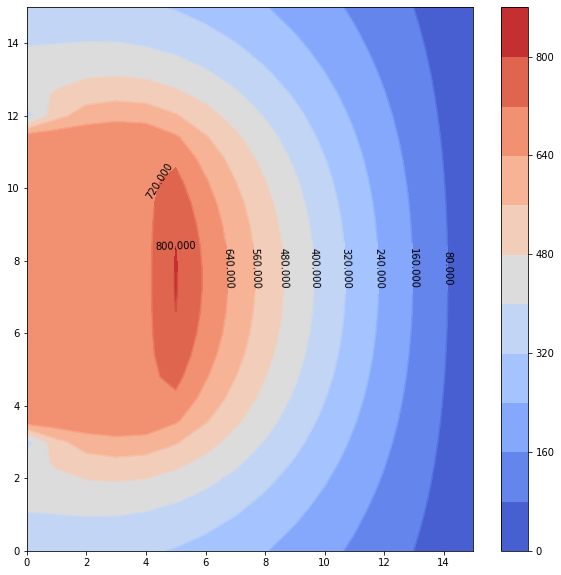

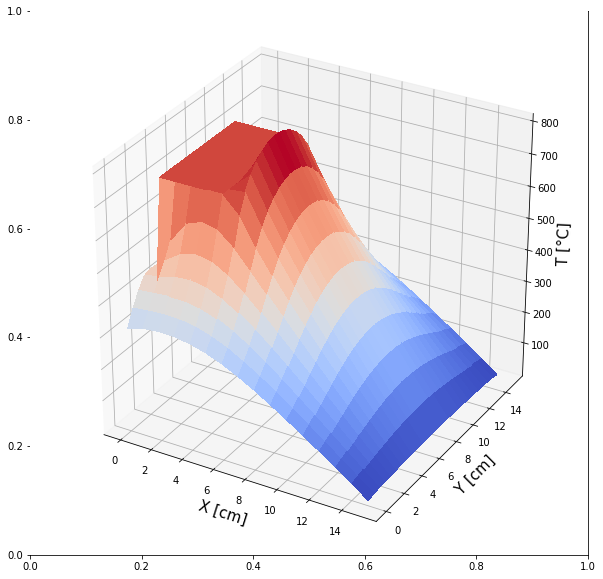

In [31]:
x_total = np.linspace(0,15,16)
y_total = np.linspace(0,15,26)
X_total,Y_total = np.meshgrid(x_total,y_total)
X_temp_total = np.zeros((np.shape(X1)[0]+np.shape(X2)[0]+np.shape(X3)[0],np.shape(X1)[1]))+Temperatura_interior
X_temp_total[0:np.shape(X1)[0],:] = X1_Temp[:,:]
X_temp_total[np.shape(X1)[0]:np.shape(X1)[0]+np.shape(X2)[0],np.shape(X_temp_total)[1]-np.shape(X2)[1]:np.shape(X_temp_total)[1]] = X2_Temp[:,:]
X_temp_total[20:26,:]=X3_Temp[:,:]


fig1, ax1 = plt.subplots(figsize=(10,10))
cs = ax1.contour(X_total, Y_total, X_temp_total,10,cmap=cm.coolwarm)
cs2 = ax1.contourf(X_total, Y_total, X_temp_total,10,cmap=cm.coolwarm)
fig1.colorbar(cs2)

ax1.clabel(cs,inline=1, colors='black', fontsize=10)

fig, ax = plt.subplots(figsize=(10,10))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(X_total, Y_total, X_temp_total,cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.xlabel('X [cm]',fontsize=15)
plt.ylabel('Y [cm]',fontsize=15)
ax.set_zlabel('T [°C]',fontsize=15)

In [15]:
a = np.array([[1,2,3],[4,5,6]])
a[:,-1]=1
print(a)


[[1 2 1]
 [4 5 1]]


In [15]:
print(X_temp_total[25,:])
print(X3_Temp[5,:])

[392.21714399 412.10839221 422.56455193 428.33790708 429.26348375
 424.78982226 414.95594051 400.42543607 382.18210371 361.23166672
 338.41981274 314.34112381 289.26132264 262.90060189 233.57720965
 194.52530429]
[392.21714399 412.10839221 422.56455193 428.33790708 429.26348375
 424.78982226 414.95594051 400.42543607 382.18210371 361.23166672
 338.41981274 314.34112381 289.26132264 262.90060189 233.57720965
 194.52530429]


In [ ]:
print()